# DATA 5600: Introduction to Regression and Machine Learning for Analytics

## __The Bootstrap for Regression__

<br>

Author:  Tyler J. Brough <br>
Updated: November 22, 2021 <br>

---

<br>

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = [10, 8]

## __Introduction__

<br>

These notes are based upon the teaching note from Kevin Sheppard of Oxford University from his MFE class. The file is in this directory in the course repository. 

<br>

### __The Bootstrap__

<br>

---

__Definition:__ The bootstrap is a statistical procedure where data is resampled, and the resampled data is used to estimate quantities of interest. 

---

<br>

Bootstraps come in many forms: 

* Structure:
    - Parametric
    - Nonparametric
    
* Dependendence type:
    - IID
    - Wild
    - Block and others for dependent data (esp. the stationary bootstrap)
    
All share common structure of using simulated random numbers in combination with original data to compute quantities of interest 

Applications:
    
* Confidence intervals
* Hypothesis testing
* Bias estimation
    
<br>

### __Basic Problem__

<br>

* Compute standard deviation for an estimator (i.e. sample mean, OLS $\beta$)

* For example, in case of of mean $\bar{x}$ for i.i.d. data, we know

<br>

$$
\large{s^{2} = \frac{1}{n-1} \sum\limits_{i=1}^{n} (x_{i} - \bar{x})^{2}}
$$

<br>

* The standard error of the mean is then

<br>

$$
\large{V[\bar{x}] = \frac{s^{2}}{n}}
$$

<br>

* which can be used to form confidence intervals or conduct hypothesis tests (in conjunction with CLT or a bootstrapped sampling distribution)

* How could you estimate the standard error for the median of $x_{1}, \ldots, x_{n}$?

* What about inference about a quantile, for example that 5th percentile of $x_{1}, \ldots, x_{n}$?

* The bootstrap is a computational method to construct standard error estimates of confidence interval for a wide range of estimators

<br>

### __The IID Bootstrap__

<br>

* Assume $n$ i.i.d. random variables $x_{1}, \ldots, x_{n}$

* Estimator of a parameter of interest $\hat{\theta}$
    - E.g. the mean or OLS $\beta$ slope coefficient
    
<br>

---

__Definition: Empirical Distribution Function (EDF)__

The empirical distribution function assigns probability $1/n$ to each observation value. For a scalar random variable $x_{i}$, with $i = 1, \ldots, n$, the EDF is defined as:

<br>

$$
\large{\hat{F}(X) = \frac{1}{n} \sum\limits_{i=1}^{n} I_{[x_{i} < X]}}
$$

---

<br>

* Also know as the empirical CDF

<br>

### __IID Bootstrap for the Mean__

<br>

---

__Algorithm: IID Bootstrap__

1. _Simulate a set of $n$ i.i.d. uniform random integers $u_{i}$, $i = 1, \ldots, n$ from the range $1, \ldots, n$ (with replacement)_

2. _Construct a bootstrap sample $x_{b}^{\ast} = \{x_{u_{1}}, x_{u_{2}}, \ldots, x_{u_{n}}\}$_

3. _Compute the mean_

<br>

$$
\large{\hat{\theta}_{b}^{\ast} = \frac{1}{n} \sum\limits_{i=1}^{n} x_{b,i}^{\ast}}
$$

<br>

4. _Repeat steps 1-3 $B$ times ($B$ is the number of bootstrap replications)_

5. _Estimate the standard error of $\hat{\theta}$ using_

<br>

$$
\large{\frac{1}{B}\sum\limits_{i=1}^{B} (\theta_{b}^{\ast} - \hat{\theta})^{2}}
$$

---

<br>
<br>

#### __Python Demonstration__

In [10]:
n = 100
#x = np.random.normal(size=n)
x = np.random.poisson(lam=5., size=n)
mu = np.mean(x)
B = 100_000
mu_star = np.zeros(B)

for b in range(B):
    u = np.random.randint(low=0, high=n-1, size=n)
    x_star = x[u]
    mu_star[b] = np.mean(x_star)
    
s2 = np.var(x)
std_err = s2/n
btstrp_std_err = np.mean((mu_star - mu)**2)

In [11]:
std_err, btstrp_std_err

(0.043424000000000004, 0.043368350999999986)

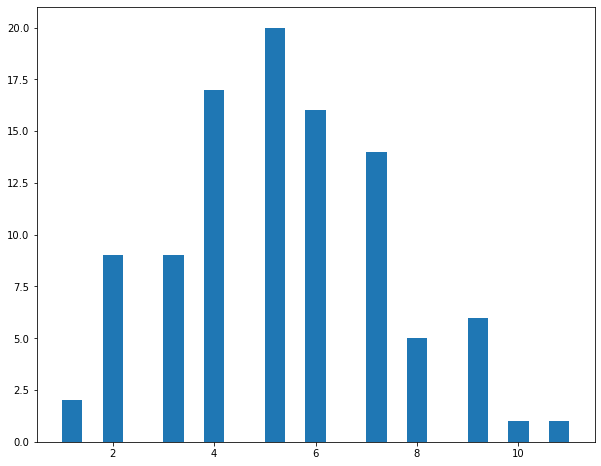

In [12]:
plt.hist(x, bins=25);

### __How Many Bootstrap Replications?__

<br>

* $B$ is used for the number of bootstrap replications

* Bootstrap theory assumes $B \rightarrow \infty$ quickly

* This ensures that the bootstrap distribution is identical to the case where all unique bootstraps were computed
    - There are a lot of unique bootstraps
    - $n^{n}$ in the i.i.d. case
    

* Using finite $B$ adds some extra variation since two bootstraps with the same data won't produce identical estimates

* ___NB:___ Often useful to set the state of your random number generator so that results are reproducible

```python
np.random.seed(123456)
```


* Should choose $B$ large enough that the _Monte Carlo error_ is negligible

* In practice little reason to use less than $10,000$ replications

<br>

### __Bootstrap Estimation of Bias__

<br>

* Many statistics have a _finite sample bias_

<br>

### __Bootstrap Estimation of Standard Error__

<br>

---

__Algorithm:__

1. _Estimate the parameter of interest $\hat{\theta}$_

2. _Generate a bootstrap sample $x_{b}$ and estimate the parameter on the bootstrap sample. Denote this sample estimate as $\hat{\theta}_{b}^{\ast}$_

3. Repeat step 2 a total of $B$ times

4. Estimate the standard error as

<br>

$$
\large{Std. Err = \sqrt{B^{-1} \sum\limits_{b=1}^{B} (\hat{\theta}_{b}^{\ast} - \hat{\theta})^{2}}}
$$

<br>

---

<br>

* Other esimators are also common 

$$
Std. Err = \sqrt{(B - 1)^{-1} \sum\limits_{b=1}^{B} (\hat{\theta}_{b}^{\ast} - \bar{\hat{\theta}_{b}^{\ast}})^{2}}
$$

<br>

* $B$ should be sufficiently large that $B$ or $B - 1$ should not matter

<br>

### __Bootstrap Estimation of Confidence Intervals__

<br>

* Bootstraps can also be used to construct confidence intervals

* Two main methods:
    1. Estimate the standard error of the estimator and use a CLT
    2. Estimate the confidence interval directly using the bootstrap estimators $\{\hat{\theta}_{b}^{\ast}\}$
    
    
* The first method is simple and has previously been explained

* The second is also very simple, and is known as the _percentile method_

<br>

### __Percentile Method__

<br>

---

__Algorithm:__ _A confidence interval $[C_{\alpha_{L}}, C_{\alpha_{H}}]$ with coverage $\alpha_{H} - \alpha_{L}$ can be constructed:_ 

1. _Construct a bootstrap sample $x_{b}$_

2. _Compute the bootstrap estimate $\hat{\theta}_{b}^{\ast}$_

3. _Repeat steps 1 - 2_

4. _The confidence interval is constructed using the empirical $\alpha_{L}$ quantile and the empirical $\alpha_{H}$ quantile of $\{\hat{\theta}_{b}^{\ast}\}$_

---

<br>

* If the bootstrap estimates are ordered from smallest to largest, and $B\alpha_{L}$ and $B\alpha_{H}$ are integers, then the confidence interval is 

<br>

$$
\Large{[\hat{\theta}_{B\alpha_{L}}^{\ast}, \hat{\theta}_{B\alpha_{H}}^{\ast}]}
$$

<br>

* This method may not work well in all situations
    - $n$ small
    - Highly asymmetric distribution
    
<br>

#### __Python Demonstration__

In [16]:
n = 100
x = np.random.normal(size=n)
mu = np.mean(x)
B = 100_000
mu_star = np.zeros(B)

for b in range(B):
    u = np.random.randint(low=0, high=n-1, size=n)
    x_star = x[u]
    mu_star[b] = np.mean(x_star)
    
    
alpha_l = 0.05
alpha_h = 0.95
mu_star = np.sort(mu_star, axis=None)
CI = (mu_star[int(alpha_l*B)], mu_star[int(alpha_h*B)])
CI - mu

array([-0.16669158,  0.1738721 ])

### __Bootstrap for Regression__

<br>

* Bootstraps can be used in more complex scenarios

* One simple extension is to regressions

* Using a model, rather than estimating a simple statistic, allows for a richer set of bootstrap options
    - Parametric
    - Nonparametric
    
    
* Basic idea, however, remains the same:
    - Simulate random data from the same DGP
    - Now requires data for both the regressor $y$ and the regressand $x$
    
<br>

#### __Parametric vs. Non-parametric Bootstrap__

<br>

* Parametric bootstraps are based on a model

* The exploit the structure of the model to re-sample residuals rather than the actual data

* Suppose 

<br>

$$
\Large{y_{i} = X_{i}\beta + \epsilon_{i}}
$$

where $\epsilon_{i}$ is homoskedastic

<br>

* The parametric bootstrap would estimate the model and the residuals as

<br>

$$
\Large{\hat{\epsilon_{i}} = y_{i} - X_{i} \hat{\beta}}
$$

<br>

* The bootstrap would then construct the re-sampled "data" by sampling $\hat{\epsilon}$ separately from $X_{i}$
    - In other words, use two separate sets of i.i.d. uniform indices
    
    
* Construct $y_{b,i}^{\ast} = x_{u_{1,i}}\hat{\beta} + \hat{\epsilon}_{u_{2,i}}$

* Compute statistics using these values

<br>

#### __Python Demonstration: Parametric Bootstrap__

In [17]:
n = 100
x = np.random.normal(size=(n,2))
e = np.random.normal(size=(n,1))
beta = np.ones((2,1))
y = np.dot(x,beta) + e

results = sm.OLS(y,x).fit()
beta_hat = results.params
e_hat = results.resid

B = 10_000
beta_star = np.zeros(B)

for b in range(B):
    ux = np.random.randint(low=0, high=n-1, size=n)
    ue = np.random.randint(low=0, high=n-1, size=n)
    x_star = x[ux,:]
    e_star = e_hat[ue]
    y_star = np.dot(x_star, beta_hat) + e_star
    results = sm.OLS(y_star, x_star).fit()
    beta_star[b] = results.params[1]

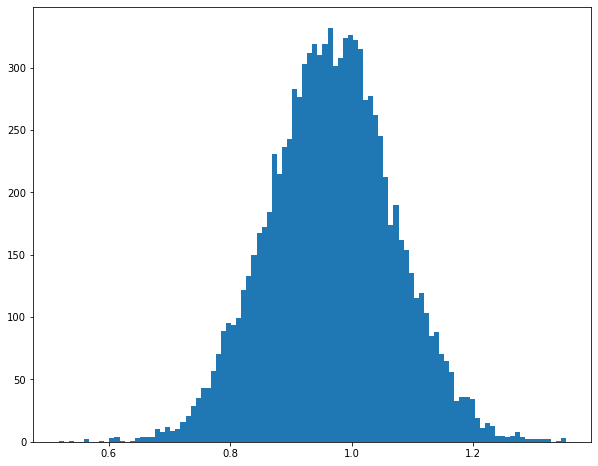

In [18]:
plt.hist(beta_star, bins=100);

In [19]:
 np.mean(beta_hat)

1.012805450244441

<br>
<br>

### __Nonparametric Bootstrap for Regression__

* Nonparametric bootstrap is simpler

* It does not use the structure of the model to construct artificial data

* The vector $[y_{i}, x_{i}]$ is instead directly resampled

* The parameters are constructed from the pairs

<br>

---

__Algorithm:__ 

1. _Simulate a set of $n$ i.i.d. uniform random integers $u_{i}$, $i = 1, \ldots, n$ from the range $1, \ldots, n$ (with replacement)_

2. _Construct the bootstrap sample $z_{b} = \{y_{u_{i}}, x_{u_{i}}\}$_

3. _Estimate the bootstrap $\beta$ by fitting the model_

<br>

$$
\large{y_{u_{i}} = x_{u_{i}} \hat{\beta}_{b}^{\ast} + \epsilon_{b,i}^{\ast}}
$$

--- 

<br>



<br>
<br>

#### __Python Demonstration: Nonparametric Bootstrap__

In [21]:
n = 100
x = np.random.normal(size=(n,2))
e = np.random.normal(size=(n,1))
beta = np.ones((2,1))
y = np.dot(x,beta) + e

results = sm.OLS(y,x).fit()
beta_hat = results.params
e_hat = results.resid

B = 10_000
beta_star = np.zeros(B)

for b in range(B):
    u = np.random.randint(low=0, high=n-1, size=n)
    y_star = y[u]
    x_star = x[u,:]
    results = sm.OLS(y_star, x_star).fit()
    beta_star[b] = results.params[1]

In [22]:
np.mean(beta_star), np.std(beta_star)

(0.9912846856780417, 0.10493135735387463)

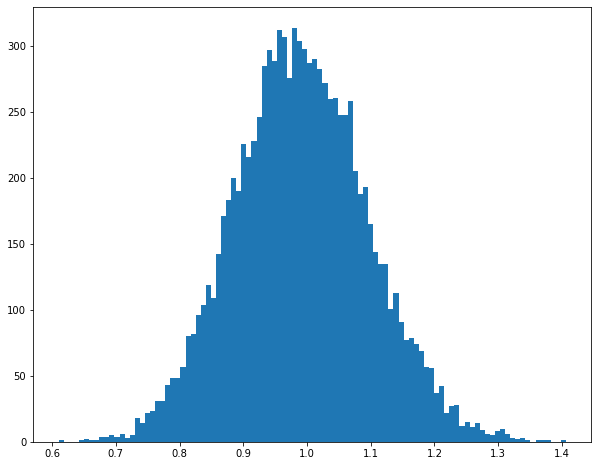

In [23]:
plt.hist(beta_star, bins=100);

In [3]:
np.random.choice(['A'], size=15)

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A'], dtype='<U1')